# 1. Data Preprocessing and Exploration

In [1]:
!pip install scikit-learn

In [2]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from scipy import stats
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn.cluster import KMeans

In [3]:
url = './Frogs_MFCCs.csv'
__count=1
df = pd.read_csv(url)
dg=[0,1,2,3,4,5,6,7,8,9,10]
print(df.head())
for x in range(__count):
  print(df.info())

   MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0       1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1       1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2       1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3       1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4       1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   

   MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  \
0 -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568  0.057684   
1 -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303  0.020140   
2 -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722 -0.025083   
3 -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498 -0.054766   
4 -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550 -0.031346   

   MFCCs_21  MFCCs_22           Family      Genus         Species  R

In [4]:
def check_missing_values(dataframe):
  for x in range(__count):
    missing_values = dataframe.isnull().sum()
  print("Missing Values per Column:", missing_values)
def nl():
  print('\n')
nl()
check_missing_values(df)
nl()



Missing Values per Column: MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64




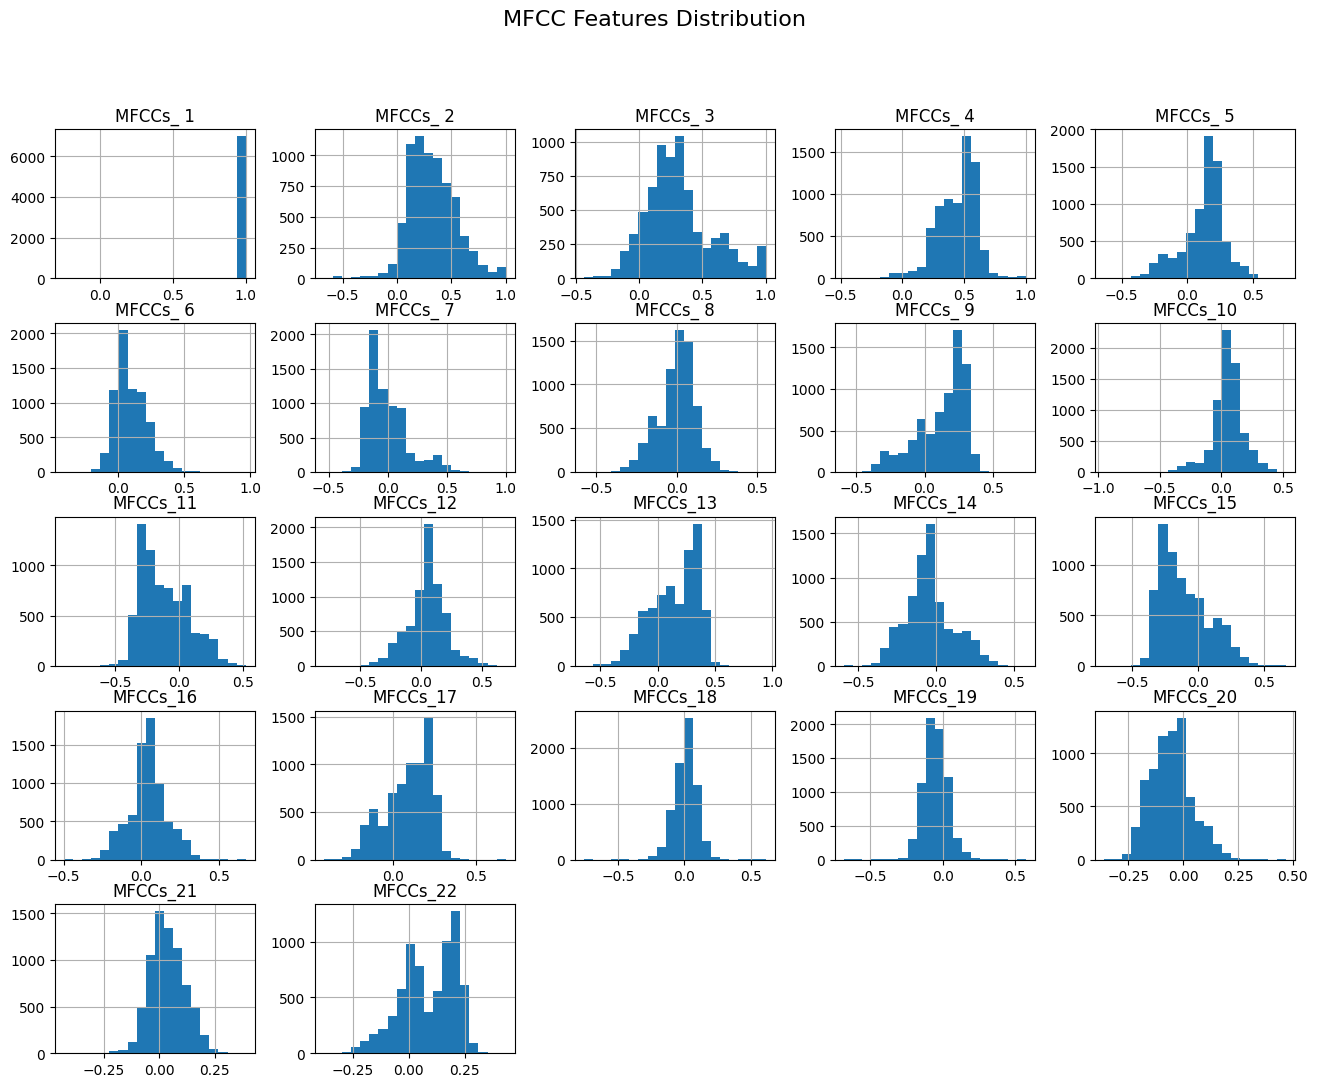

In [5]:
def plot_feature_distributions(dataframe):
    mfcc_features = dataframe.iloc[:, :22]
    mfcc_features.hist(figsize=(dg[8]+dg[8], dg[6]*2), bins=2*dg[10])
    plt.suptitle('MFCC Features Distribution', fontsize=dg[8]+dg[8])
    plt.show()
nl()
plot_feature_distributions(df)

In [6]:
def detect_outliers(dataframe, threshold=dg[3]):
    for x in range(__count):
      z_scores = np.abs(stats.zscore(dataframe.iloc[:, :22+dg[0]]))
      outliers = np.where(z_scores > threshold)
    nl()
    print(f"Number of outliers detected: {len(outliers[dg[0]])}")
if(dg[2]<dg[5]):
  detect_outliers(df)



Number of outliers detected: 916


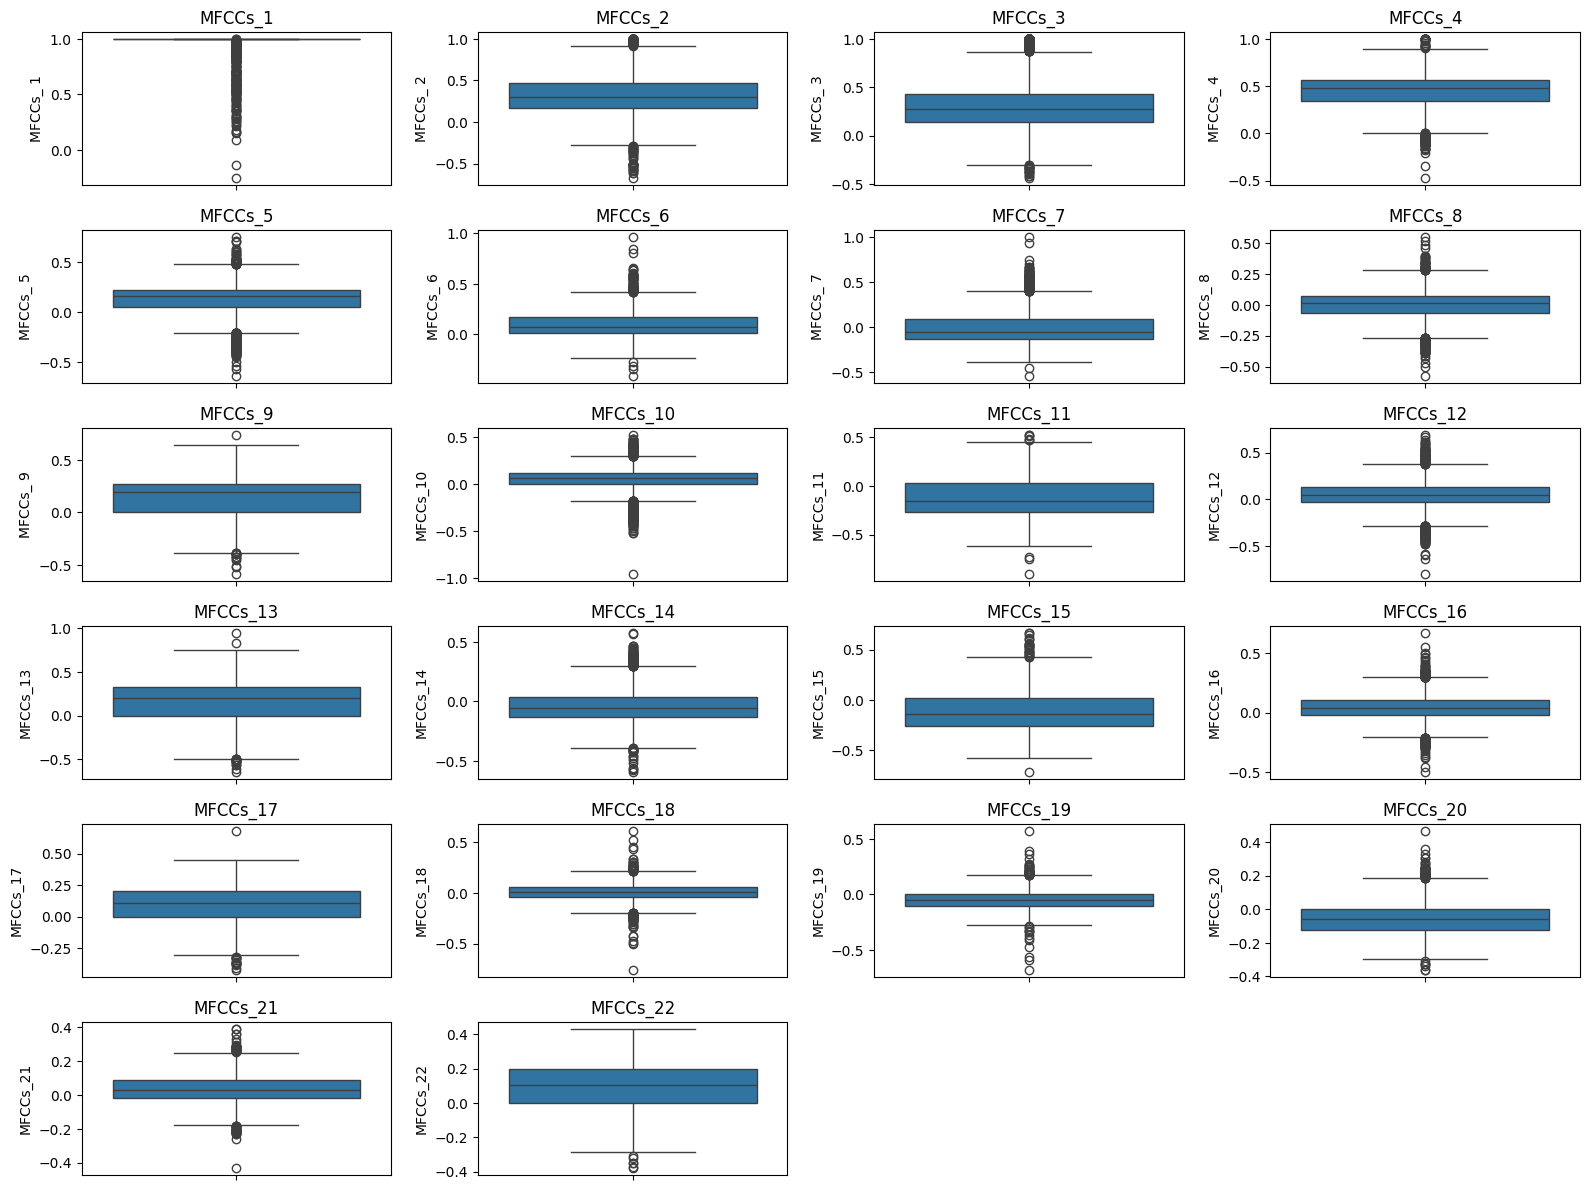

In [7]:
from sklearn.model_selection import train_test_split
def plot_boxplots(dataframe):
  for x in range(__count):
    plt.figure(figsize=(4*dg[4], dg[6]*2))
    for i in range(22*__count):
        plt.subplot(dg[6], dg[4], i + dg[1])
        if(dg[2]<dg[5]):
          sns.boxplot(y=dataframe.iloc[:, i+dg[0]])
          plt.title(f'MFCCs_{i + dg[1]}')
    plt.tight_layout()
    plt.show()
    nl()
nl()
plot_boxplots(df)

def split_data(dataframe):
    X = dataframe.iloc[:, :22*dg[1]]
    for x in range(__count):
      y = dataframe['Species']
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2*__count, random_state=dg[7]*dg[6])
    if(dg[2]<dg[5]):
      return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(df)


*Data scaling*


In [8]:
sd="Scaled Data:"
def apply_standardization(dataframe):
  for x in range(__count):
    if(dg[2]<dg[5]):
      scaler = StandardScaler()
      scaled_data = scaler.fit_transform(dataframe.iloc[:, :22*dg[1]])
    scaled_df = pd.DataFrame(scaled_data, columns=[f'MFCCs_{i+__count}' for i in range(11*dg[2])])
    return scaled_df
sahi=True
galat=False
if(dg[2]!=dg[5]-dg[1]):
  scaled_df = apply_standardization(df)
nl()
print(sd)
print(scaled_df.head())




Scaled Data:
    MFCCs_1   MFCCs_2   MFCCs_3   MFCCs_4   MFCCs_5   MFCCs_6   MFCCs_7  \
0  0.146578 -0.780502 -1.581769 -1.529944  1.168666  1.352327  0.597119   
1  0.146578 -0.695439 -1.556680 -1.107634  1.300622  1.415359  0.363097   
2  0.146578 -0.783334 -1.495953 -0.990973  0.915536  0.763498  0.058992   
3  0.146578 -0.453678 -0.729537 -0.727096  1.505993  2.184868  0.098592   
4  0.146578 -1.078343 -1.440441 -0.867225  1.252998  1.255819  0.048313   

    MFCCs_8   MFCCs_9  MFCCs_10  ...  MFCCs_13  MFCCs_14  MFCCs_15  MFCCs_16  \
0 -1.287190 -1.672333  0.540390  ... -1.485897  0.796627  1.265956 -0.551081   
1 -1.909853 -1.876612  0.903961  ... -1.959178  0.406743  1.412903 -0.250524   
2 -2.079764 -1.940639  1.389091  ... -1.877203  0.590374  1.647536  0.345883   
3 -1.667990 -1.264799  1.686808  ... -2.262481  0.181478  1.077586 -0.769643   
4 -2.279164 -1.681117  1.655798  ... -2.172759  0.502823  1.710511  0.173262   

   MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  MFCCs_21  

In [9]:
pf="Polynomial Features:"
def add_polynomial_features(dataframe, degree=dg[2]):
    poly = PolynomialFeatures(degree, include_bias=galat)
    for x in range(__count):
      poly_features = poly.fit_transform(dataframe)
      feature_names = poly.get_feature_names_out([f'MFCCs_{i+dg[1]}' for i in range(22+dg[0])])
      poly_df = pd.DataFrame(poly_features, columns=feature_names)
    if(dg[2]<dg[5]):
      return poly_df
for x in range(__count):
  poly_df = add_polynomial_features(scaled_df, degree=dg[2])
nl()
print(pf)
for x in range(__count):
  print(poly_df.head())




Polynomial Features:
    MFCCs_1   MFCCs_2   MFCCs_3   MFCCs_4   MFCCs_5   MFCCs_6   MFCCs_7  \
0  0.146578 -0.780502 -1.581769 -1.529944  1.168666  1.352327  0.597119   
1  0.146578 -0.695439 -1.556680 -1.107634  1.300622  1.415359  0.363097   
2  0.146578 -0.783334 -1.495953 -0.990973  0.915536  0.763498  0.058992   
3  0.146578 -0.453678 -0.729537 -0.727096  1.505993  2.184868  0.098592   
4  0.146578 -1.078343 -1.440441 -0.867225  1.252998  1.255819  0.048313   

    MFCCs_8   MFCCs_9  MFCCs_10  ...  MFCCs_19^2  MFCCs_19 MFCCs_20  \
0 -1.287190 -1.672333  0.540390  ...    0.233750           0.569490   
1 -1.909853 -1.876612  0.903961  ...    0.029474           0.133781   
2 -2.079764 -1.940639  1.389091  ...    0.043665          -0.062486   
3 -1.667990 -1.264799  1.686808  ...    0.963614           0.015868   
4 -2.279164 -1.681117  1.655798  ...    0.224132          -0.110087   

   MFCCs_19 MFCCs_21  MFCCs_19 MFCCs_22  MFCCs_20^2  MFCCs_20 MFCCs_21  \
0           0.495051     

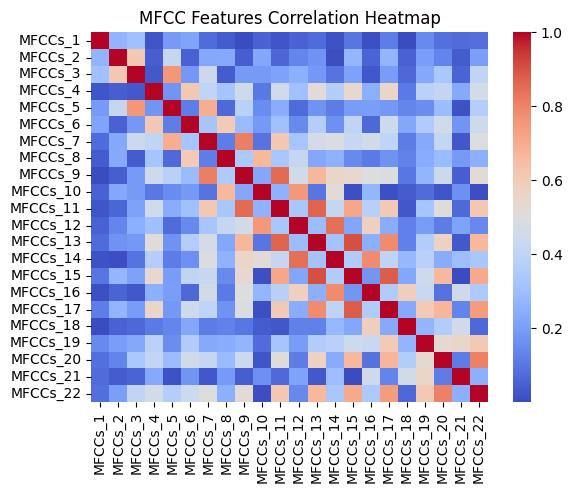



Highly correlated features (above 0.9 threshold): ['MFCCs_15']


In [10]:
cw='coolwarm'
mfch='MFCC Features Correlation Heatmap'
def feature_correlation_analysis(dataframe, threshold=0.9*dg[1]):
    corr_matrix = dataframe.corr().abs()
    for x in range(__count):
      sns.heatmap(corr_matrix, cmap=cw, annot=galat)
      plt.title(mfch)
      plt.show()
    if(dg[2]<dg[5]):
      for x in range(__count):
        upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=dg[1]).astype(np.bool_))
        correlated_features = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
      nl()
      print(f"Highly correlated features (above {threshold} threshold):", correlated_features)
    if(dg[9]!=dg[5]+dg[2]):
      dataframe_reduced = dataframe.drop(correlated_features, axis=dg[1])
    return dataframe_reduced
nl()
df_reduced = feature_correlation_analysis(scaled_df)

# 2. K-Means Clustering

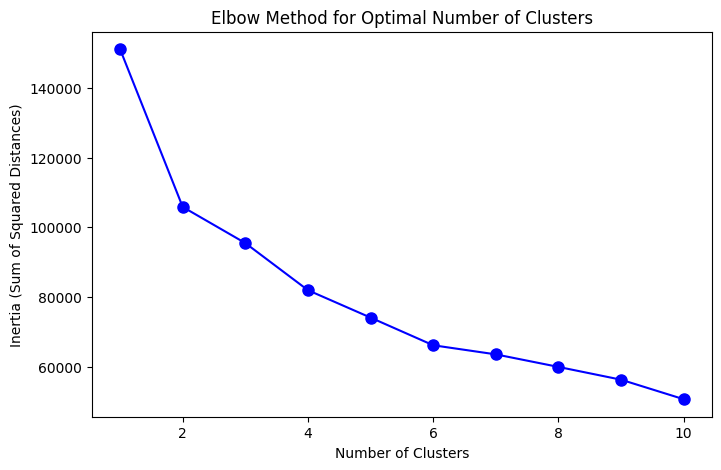

In [11]:
noc='Number of Clusters'
zoo='k-means++'
isos='Inertia (Sum of Squared Distances)'
emc='Elbow Method for Optimal Number of Clusters'
def elbow_method(data, max_clusters=dg[10]):
  for x in range(__count):
    inertia = []
    for n_clusters in range(__count, max_clusters+__count):
      for x in range(__count):
        kmeans = KMeans(n_clusters=n_clusters, init=zoo, random_state=dg[7]*dg[6])
        if(dg[2]<dg[5]):
          kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(dg[8], dg[5]))
    for x in range(__count):
      plt.plot(range(__count, max_clusters+__count), inertia, 'bo-', markersize=dg[8])
      plt.xlabel(noc)
      plt.ylabel(isos)
      plt.title(emc)
    plt.show()
nl()
elbow_method(df_reduced)

In [12]:
def silhouette_evaluation(data, n_clusters):
  for x in range(__count):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=dg[7]*dg[6])
    cluster_labels = kmeans.fit_predict(data)
    if(dg[2]<dg[5]):
      for x in range(__count):
        score = silhouette_score(data, cluster_labels)
        print(f'Silhouette Score for {n_clusters} clusters: {score:.4f}')
        nl()
      return score

optimal_clusters = dg[3]
for x in range(__count):
  silhouette_evaluation(df_reduced, optimal_clusters)


Silhouette Score for 3 clusters: 0.3274




In [13]:
clr='Cluster'
def kmeans_clustering(data, n_clusters):
  if(dg[2]<dg[5]):
    for x in range(__count):
      kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=dg[7]*dg[6])
    cluster_labels = kmeans.fit_predict(data)
    for x in range(__count):
      data_with_clusters = data.copy()
      data_with_clusters[clr] = cluster_labels

    print(f'Cluster Centers:\n{kmeans.cluster_centers_}')
    nl()
    return data_with_clusters
for x in range(__count):
  clustered_data = kmeans_clustering(df_reduced, optimal_clusters)
  nl()
  print(clustered_data.head())


Cluster Centers:
[[ 0.11573903 -0.21034087 -0.35732873  0.67679717  0.37950287 -0.57962255
  -0.66219732  0.40717956  0.73553468 -0.18562476 -0.78881438  0.35955807
   0.79044032 -0.49790324  0.42726404  0.78340826  0.01450218 -0.61783294
  -0.69207165  0.29200353  0.81974916]
 [-0.12680283  0.11137751  0.22436707 -0.82817385 -0.16581303  0.77948336
   0.42024851 -0.50031374 -0.52731735  0.10238814  0.64915928 -0.23293299
  -0.7450997   0.34972278 -0.27313359 -0.84658233 -0.17018035  0.72011244
   0.73988688 -0.39886825 -0.83234107]
 [-0.02454599  0.93540111  1.32604148  0.50493566 -1.95054732 -0.95775939
   2.42408171  0.31920821 -2.2397296   0.79482836  1.77620301 -1.28070322
  -1.0721232   1.57024159 -1.54925601 -0.25378055  1.15121588 -0.19230228
   0.28399337  0.52872409 -0.6658932 ]]




    MFCCs_1   MFCCs_2   MFCCs_3   MFCCs_4   MFCCs_5   MFCCs_6   MFCCs_7  \
0  0.146578 -0.780502 -1.581769 -1.529944  1.168666  1.352327  0.597119   
1  0.146578 -0.695439 -1.556680 -1.107634  1.

In [14]:
def frs(random_score):
  for x in range(__count):
    print(f'Silhouette Score (Random Initialization): {random_score:.4f}')
def pps(plus_plus_score):
  if(dg[2]<dg[5]):
    print(f'Silhouette Score (k-means++ Initialization): {plus_plus_score:.4f}')

def compare_initialization(data, n_clusters):
  for x in range(__count):
    kmeans_random = KMeans(n_clusters=n_clusters, init='random', random_state=dg[7]*dg[6])
    kmeans_random.fit(data)
    random_score = silhouette_score(data, kmeans_random.labels_)
    if(dg[2]<dg[5]):
      kmeans_plus_plus = KMeans(n_clusters=n_clusters, init='k-means++', random_state=dg[7]*dg[6])
      kmeans_plus_plus.fit(data)
      plus_plus_score = silhouette_score(data, kmeans_plus_plus.labels_)
    frs(random_score)
    nl()
    pps(plus_plus_score)
compare_initialization(df_reduced, optimal_clusters)


Silhouette Score (Random Initialization): 0.3493


Silhouette Score (k-means++ Initialization): 0.3274


# 3.Cluster Visualization

In [15]:
tkmc='K-Means Clusters (PCA-reduced Data)'
mfcc_features = df.iloc[:, :22]
pc2='PCA Component 2'
scaler = StandardScaler()
df_scaled = scaler.fit_transform(mfcc_features)
pc1='PCA Component 1'

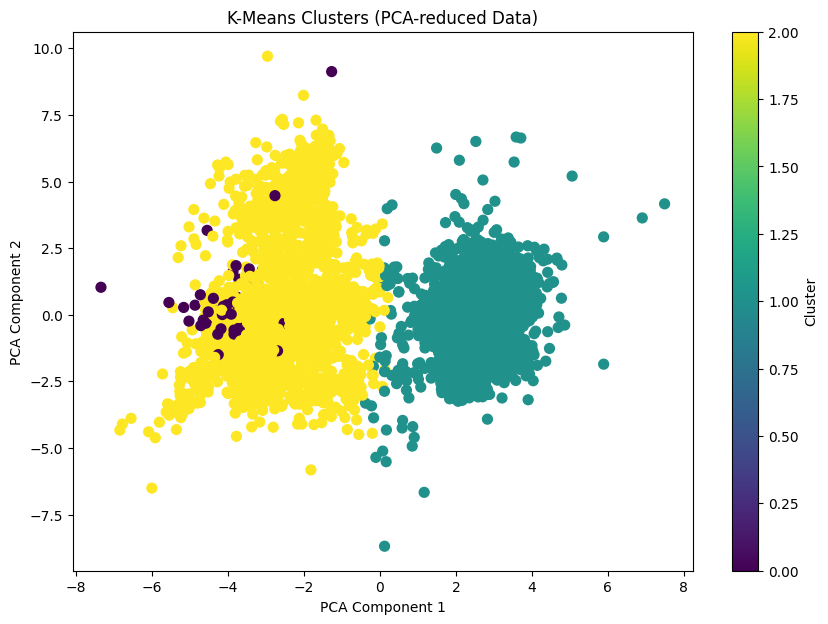

In [16]:

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
vd='viridis'
for x in range(__count):
  kmeans = KMeans(n_clusters=dg[3])
  kmeans.fit(df_scaled)
  plt.figure(figsize=(dg[10], dg[7]))
  if(dg[2]<dg[5]):
    for x in range(__count):
      plt.scatter(df_pca[:, dg[0]], df_pca[:, dg[1]], c=kmeans.labels_, cmap=vd, s=5*dg[10])
      plt.title(tkmc)
      plt.xlabel(pc1)
  plt.ylabel(pc2)
plt.colorbar(label=clr)
nl()
plt.show()


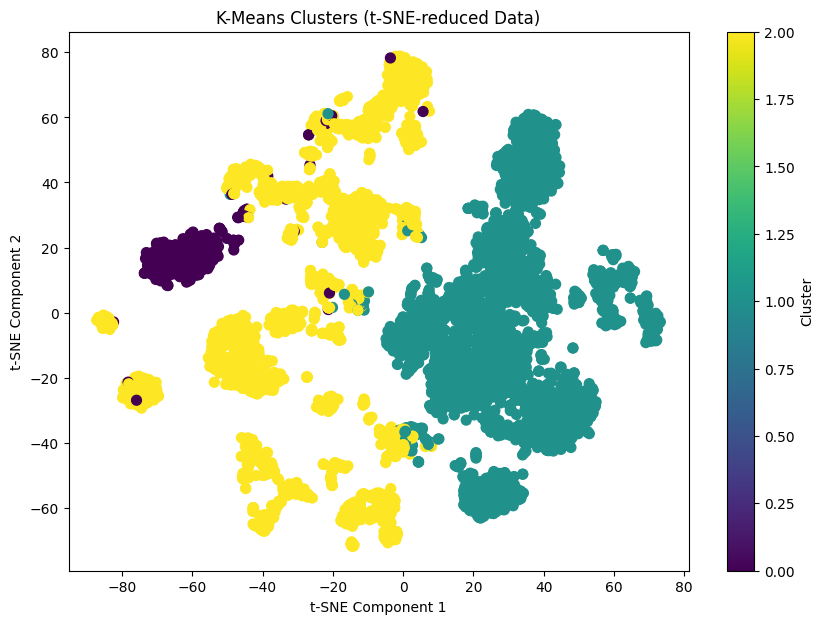

In [17]:
kt='K-Means Clusters (t-SNE-reduced Data)'
tc1='t-SNE Component 1'
tsne = TSNE(n_components=dg[2], perplexity=30, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)
tc2='t-SNE Component 2'
for x in range(__count):
  plt.figure(figsize=(dg[10],dg[7]))
  plt.scatter(df_tsne[:, dg[0]], df_tsne[:, dg[1]], c=kmeans.labels_, cmap=vd, s=5*dg[10])
  if(dg[2]<dg[5]):
    plt.title(kt)
    plt.xlabel(tc1)
plt.ylabel(tc2)
plt.colorbar(label=clr)
nl()
plt.show()


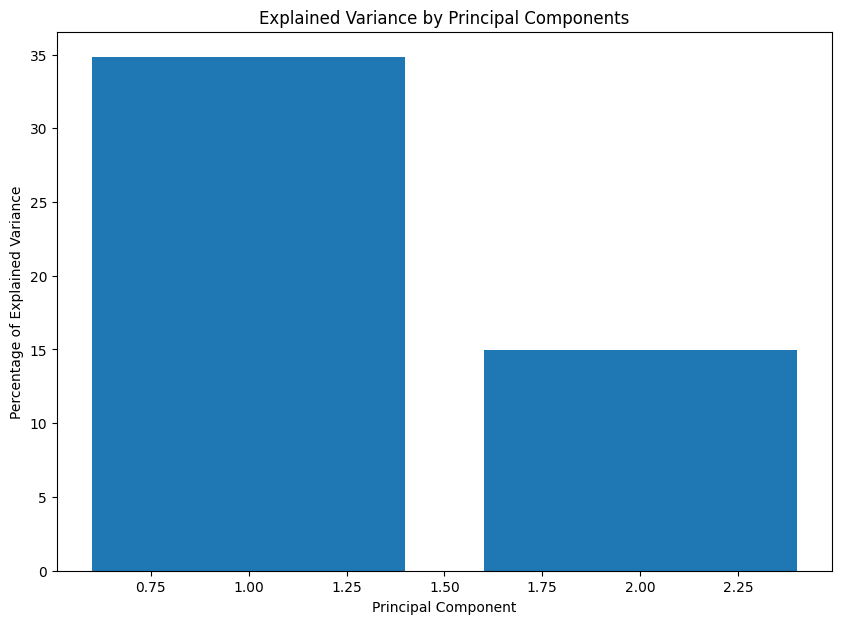

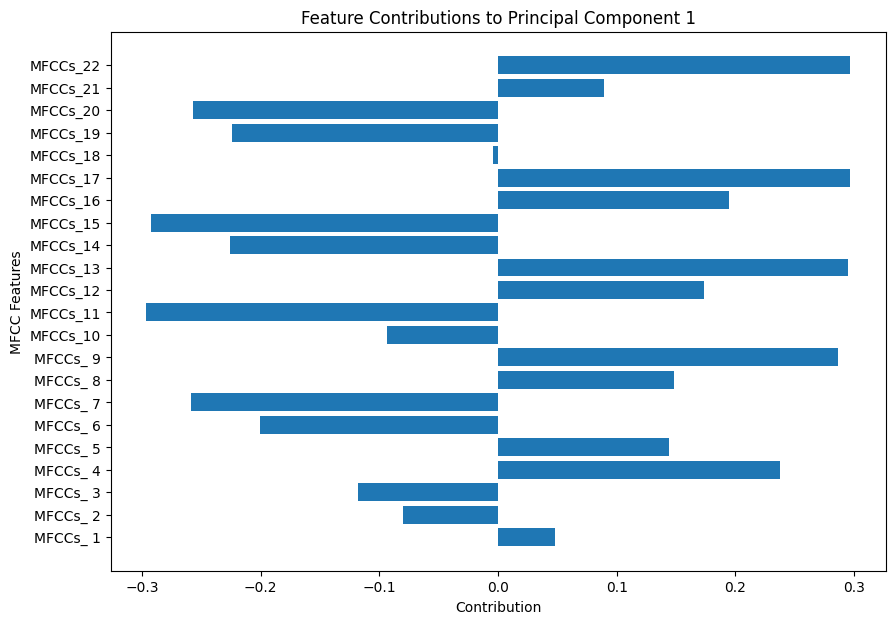

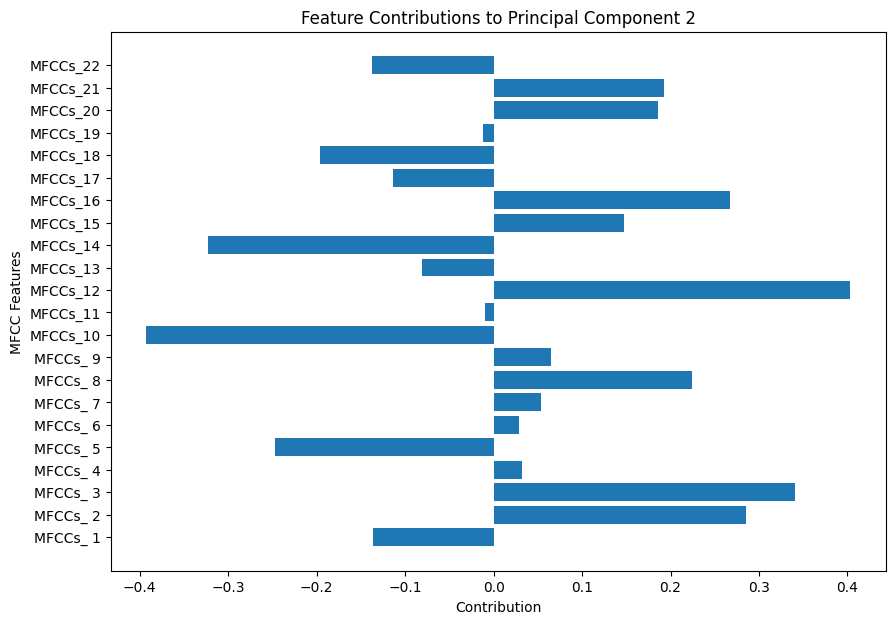

In [18]:
explained_variance = pca.explained_variance_ratio_
contri='Contribution'
pca_components = pca.components_
fcp2='Feature Contributions to Principal Component 2'
"""
contribution of each MFCC feature to the principal components
"""
pc='Principal Component'
evpc='Explained Variance by Principal Components'
for x in range(__count):
  plt.figure(figsize=(dg[10],dg[7]))
  plt.bar(range(dg[1], len(explained_variance) + dg[1]), explained_variance*10*dg[10])
  plt.title(evpc)
  plt.xlabel(pc)
if(dg[2]<dg[5]):
  plt.ylabel('Percentage of Explained Variance')
  plt.show()
fcp1='Feature Contributions to Principal Component 1'
"""
Plot feature contributions to the first two principal components
"""
mf='MFCC Features'
plt.figure(figsize=(dg[10],dg[7]))
for x in range(__count):
  plt.barh(range(22+dg[0]), pca_components[dg[0]])
  plt.yticks(range(22+dg[0]), mfcc_features.columns)
  plt.title(fcp1)
  plt.xlabel(contri)
  plt.ylabel(mf)
nl()
plt.show()
if(dg[2]<dg[5]):
  plt.figure(figsize=(dg[10],dg[7]))
  for x in range(__count):
    plt.barh(range(22*dg[1]), pca_components[dg[1]])
    plt.yticks(range(22*dg[1]), mfcc_features.columns)
    plt.title(fcp2)
  plt.xlabel(contri)
  plt.ylabel(mf)
nl()
plt.show()


# 4.Cluster Evaluation Metrics

In [22]:
if(dg[2]<dg[5]):
  X = df_reduced
  cluster_labels = clustered_data[clr]
  for x in range(__count):
    db_index = davies_bouldin_score(X, cluster_labels)
    print(f'Davies-Bouldin Index: {db_index:.4f}')
ch_index = calinski_harabasz_score(X, cluster_labels)
for x in range(dg[0]):
  print(f'Calinski-Harabasz Index: {ch_index:.4f}')
nl()


Davies-Bouldin Index: 1.2876




In [23]:
silhouette_score_value = 0.3274
ss='Silhouette Score'
print(f'Optimal Number of Clusters: {optimal_clusters}')
noc='Number of Clusters'
print(f'Silhouette Score: {silhouette_score_value:.4f}')
def chinc():
  plt.title('Calinski-Harabasz Index vs Number of Clusters')
  plt.xlabel(noc)
  plt.ylabel('Calinski-Harabasz Index')
print(f'Davies-Bouldin Index: {db_index:.4f}')
print(f'Calinski-Harabasz Index: {ch_index:.4f}')


Optimal Number of Clusters: 3
Silhouette Score: 0.3274
Davies-Bouldin Index: 1.2876
Calinski-Harabasz Index: 2094.2584


In [24]:
ssvnc='Silhouette Score vs Number of Clusters'
def evaluate_clustering_metrics(data, max_clusters):
    silhouette_scores = []
    dbi_scores = []
    ch_index_scores = []

    for n_clusters in range(2, max_clusters + dg[1]):
        if(dg[2]<dg[5]):
          kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=dg[7]*dg[6])
        cluster_labels = kmeans.fit_predict(data)
        for x in range(__count):
          silhouette_scores.append(silhouette_score(data, cluster_labels))
          dbi_scores.append(davies_bouldin_score(data, cluster_labels))
          ch_index_scores.append(calinski_harabasz_score(data, cluster_labels))

    return silhouette_scores, dbi_scores, ch_index_scores


In [25]:
max_clusters = dg[10]
for x in range(__count):
  silhouette_scores, dbi_scores, ch_index_scores = evaluate_clustering_metrics(df_reduced, max_clusters)
def dbplot():
  plt.title('Davies-Bouldin Index vs Number of Clusters')
  plt.xlabel(noc)
  plt.ylabel('Davies-Bouldin Index')

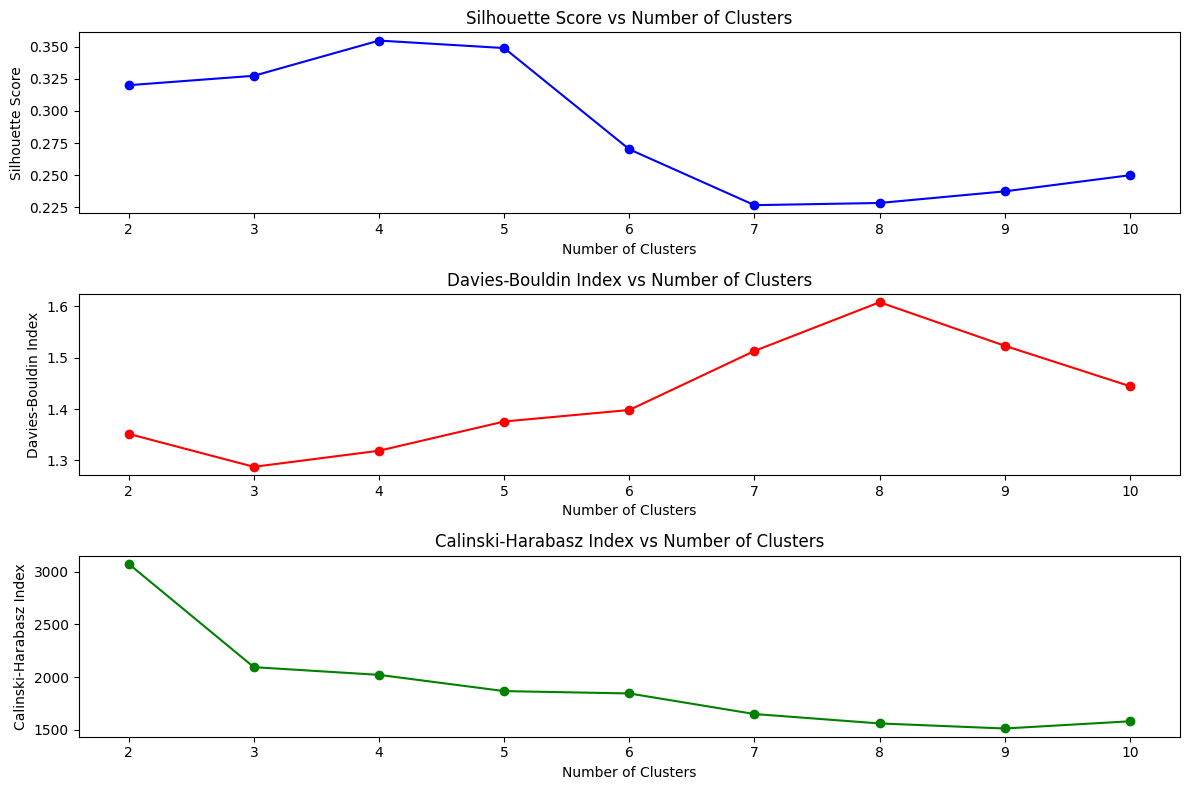

In [26]:

cluster_range = range(dg[2], max_clusters + dg[1])

plt.figure(figsize=(12, dg[8]))

plt.subplot(dg[3], dg[1], dg[1])

for x in range(__count):
  plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
  plt.title(ssvnc)
  plt.xlabel(noc)
  plt.ylabel(ss)

plt.subplot(dg[3], dg[1], dg[2])
plt.plot(cluster_range, dbi_scores, marker='o', linestyle='-', color='r')
dbplot()

plt.subplot(dg[3], dg[1], dg[3])
plt.plot(cluster_range, ch_index_scores, marker='o', linestyle='-', color='g')
chinc()

plt.tight_layout()
plt.show()


# 5. Comparison with Other Clustering Algorithms

In [27]:

def agglomerative_clustering(data, n_clusters):
    for x in range(__count):
      agglo = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agglo.fit_predict(data)
    return cluster_labels
def f12():
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
if(dg[9]==dg[5]+dg[4]):
  agglo_labels = agglomerative_clustering(df_reduced, optimal_clusters)


In [28]:
dbc='DBSCAN Clustering'
def dbscan_clustering(data, eps=0.5+dg[0], min_samples=5*dg[1]):
    for x in range(__count):
      dbscan = DBSCAN(eps=eps, min_samples=min_samples)
      cluster_labels = dbscan.fit_predict(data)
    if(dg[9]==dg[5]+dg[4]):
      return cluster_labels
kmc='K-Means Clustering'
dbscan_labels = dbscan_clustering(df_reduced)


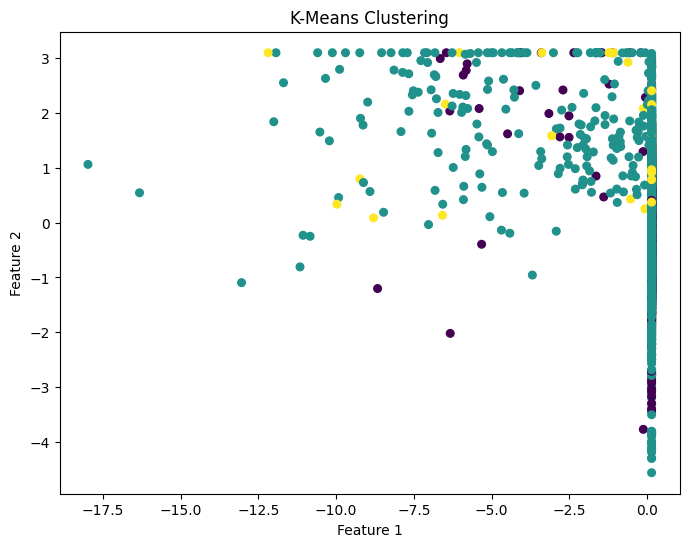

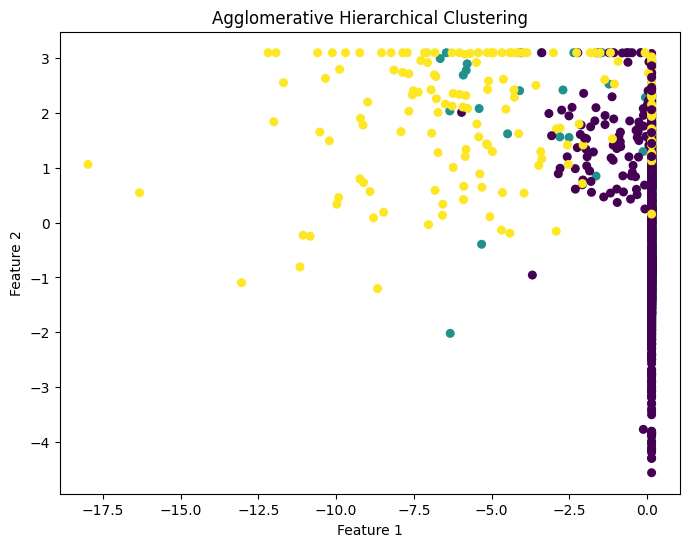

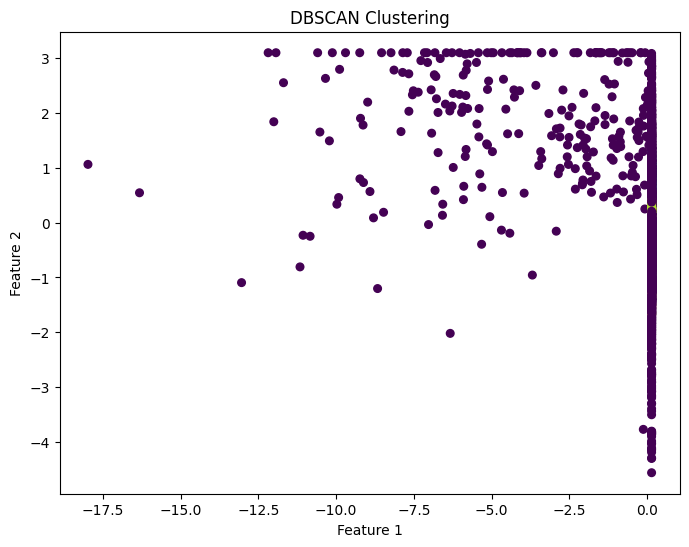

In [29]:
ahc='Agglomerative Hierarchical Clustering'
def plot_clusters(data, labels, title):
    for x in range(__count):
      plt.figure(figsize=(dg[8], dg[6]))
      plt.scatter(data.iloc[:, dg[0]], data.iloc[:, dg[1]], c=labels, cmap=vd, s=dg[5]*dg[6])
      plt.title(title)
    f12()
    plt.show()

if(dg[9]==dg[5]+dg[4]):
  plot_clusters(df_reduced, clustered_data[clr], kmc)
  nl()
plot_clusters(df_reduced, agglo_labels, ahc)
def ahcm():
  print("Agglomerative Hierarchical Clustering Metrics:")
if(dg[9]>=dg[4]):
  nl()
  plot_clusters(df_reduced, dbscan_labels, dbc)


In [30]:
i=0
kmm="K-Means Metrics:"
kmeans_silhouette = silhouette_score(df_reduced, clustered_data[clr])
for x in range(__count):
  kmeans_dbi = davies_bouldin_score(df_reduced, clustered_data[clr])
  kmeans_ch_index = calinski_harabasz_score(df_reduced, clustered_data[clr])
while(i<dg[1]):
  agglo_silhouette = silhouette_score(df_reduced, agglo_labels)
  if(dg[9]==dg[5]+dg[4]):
    agglo_dbi = davies_bouldin_score(df_reduced, agglo_labels)
  agglo_ch_index = calinski_harabasz_score(df_reduced, agglo_labels)
  i+=1

dbscan_silhouette = silhouette_score(df_reduced, dbscan_labels) if len(set(dbscan_labels)) > dg[1] else -1*dg[1]
if(dg[9]==dg[5]+dg[4]):
  dbscan_dbi = davies_bouldin_score(df_reduced, dbscan_labels) if len(set(dbscan_labels)) > dg[1] else -1*dg[1]
  dbscan_ch_index = calinski_harabasz_score(df_reduced, dbscan_labels) if len(set(dbscan_labels)) > dg[1] else -1*dg[1]
dbm="DBSCAN Metrics:"
print(kmm)
print(f'Silhouette Score: {kmeans_silhouette:.4f}, Davies-Bouldin Index: {kmeans_dbi:.4f}, Calinski-Harabasz Index: {kmeans_ch_index:.4f}')
nl()
ahcm()
print(f'Silhouette Score: {agglo_silhouette:.4f}, Davies-Bouldin Index: {agglo_dbi:.4f}, Calinski-Harabasz Index: {agglo_ch_index:.4f}')
nl()
print(dbm)
print(f'Silhouette Score: {dbscan_silhouette:.4f}, Davies-Bouldin Index: {dbscan_dbi:.4f}, Calinski-Harabasz Index: {dbscan_ch_index:.4f}')


K-Means Metrics:
Silhouette Score: 0.3274, Davies-Bouldin Index: 1.2876, Calinski-Harabasz Index: 2094.2584


Agglomerative Hierarchical Clustering Metrics:
Silhouette Score: 0.3390, Davies-Bouldin Index: 1.4822, Calinski-Harabasz Index: 2149.8463


DBSCAN Metrics:
Silhouette Score: -0.2293, Davies-Bouldin Index: 1.7034, Calinski-Harabasz Index: 16.9242


In [31]:
!pip freeze > requirements.txt